<a href="https://colab.research.google.com/github/JonasHagstrom79/Tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other commbination of variables, even shorter... predicting a number.


In [54]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


#Creating some data to view and fit

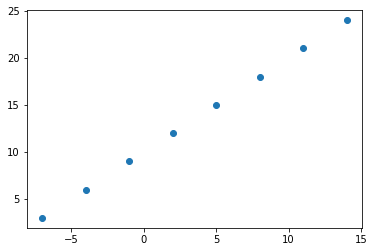

In [55]:
import numpy as np
import matplotlib.pyplot as plt

#Create features(upper case)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) 

#Create labels(lower case)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y);

In [56]:
y == X + 10 #(The relationship for our neural network to learn)

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and output shapes

In [57]:
#Create a deo tensor for our price predicition problem
house_info  = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [58]:
#X to predict y
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [59]:
#X to predict y
X[0], y[0]

(-7.0, 3.0)

In [60]:
#X to predict y
X[1], y[1]

(-4.0, 6.0)

### Fix

If you're running TensorFlow 2.7.0+ and you're passing a vector to a model, you need to expand its dimensions.

    ## OLD
    # Fit the model
    model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
     
    ## New
    # Fit the model
    model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line

The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

In [61]:
#Turn our NumPy arrays into tenors
X = tf.cast(tf.constant(X), dtype=tf.float32) #Change dtype from float64 to float 32
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [62]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

##Steps in modeling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function(in other words, the function wich tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y(features and labels)

In [63]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model using Sequentila API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) #input, the model takes in one number and predicts one number, adds the layer to a list, thare are other ways to do this aswell. I.e model = tf.keras.Sequential(), new line. model.add(tf.keras.layers.Dense(1))
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error(i.e how wrong is our predictions)
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for stochastic gradient descent
              metrics=["mae"]) #You can often use a string variable to define that you want to ue that specific function

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) #Look at X and y and try to figure out the paterns/relationships in epoch tries


Epoch 1/5
1/1 [==============================] - 0s 265ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


🔧 **Practice:** Info and example of Sequential: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

In [64]:
#Check out of X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [65]:
#Try to make a prediction with our model
y_pred = model.predict([17.0]) #A prediction to X=17 an y SHOULD BE 27(X+10..)
y_pred

array([[12.716021]], dtype=float32)

In [66]:
y_pred  + 11

array([[23.71602]], dtype=float32)

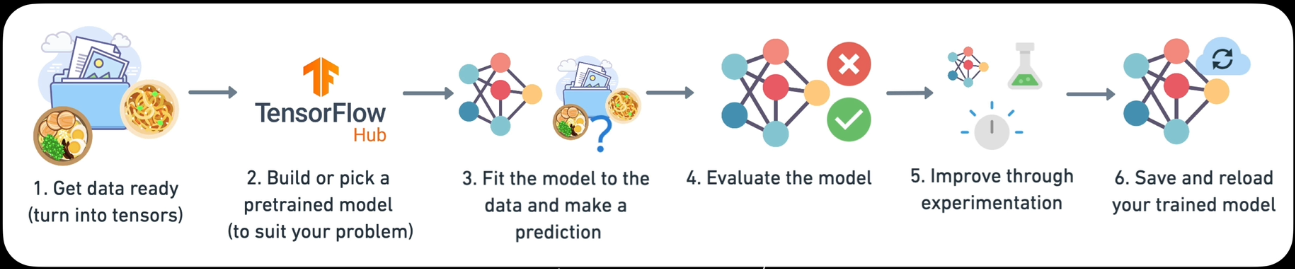
#Steps in modelling with TensorFlow
1. Construct or import a pretrained model relevant to your problem
2. Compile the model(prepare it to be used with data)
 * **Loss** - how rong your model's predictions are compared to the truthlabels(you want to minimise this)
 * **Optimizer** - how your model should update its internal patterns to better its perfection
 * **Metrics** - human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns
 * **Epochs** - how many times the model will go through all of the training examples.
4. Evaluate the model on the test data(how reliable are our model's predictions?)


#Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs**(leave i training for longer) or on more data(give the model more examples to learn from).

In [67]:
#Let's rebuild the model

#1. Create the model
model = tf.keras.Sequential([ #Sequential runs from top to bottom
        tf.keras.layers.Dense(100, activation="relu"),#added
        tf.keras.layers.Dense(100, activation="relu"),#added
        tf.keras.layers.Dense(100, activation="relu"),#added
        tf.keras.layers.Dense(1)                    
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              #optimizer=tf.keras.optimizers.SGD(),
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

#3. Fit the model (longer trainng)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=1500)

Epoch 1/1500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 443ms/step - loss: 14.3099 - mae: 14.3099
Epoch 2/1500
1/1 [==============================] - 0s 7ms/step - loss: 14.2781 - mae: 14.2781
Epoch 3/1500
1/1 [==============================] - 0s 6ms/step - loss: 14.2469 - mae: 14.2469
Epoch 4/1500
1/1 [==============================] - 0s 6ms/step - loss: 14.2158 - mae: 14.2158
Epoch 5/1500
1/1 [==============================] - 0s 6ms/step - loss: 14.1840 - mae: 14.1840
Epoch 6/1500
1/1 [==============================] - 0s 6ms/step - loss: 14.1522 - mae: 14.1522
Epoch 7/1500
1/1 [==============================] - 0s 6ms/step - loss: 14.1204 - mae: 14.1204
Epoch 8/1500
1/1 [==============================] - 0s 8ms/step - loss: 14.0885 - mae: 14.0885
Epoch 9/1500
1/1 [==============================] - 0s 8ms/step - loss: 14.0568 - mae: 14.0568
Epoch 10/1500
1/1 [==============================] - 0s 6ms/step - loss: 14.0250 - mae: 14.0250
Epoch 11/1500
1/1 [==============================] - 0s 13ms

In [68]:
model.predict([17.0]) #overfitting?

array([[27.775532]], dtype=float32)

In [69]:
#Lets see if we can make another to improve our model
#Adjust one thing at a time, small changes to be certain what caused the improvement

#1. Create the model (an extra hidden layer with 100 units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                             
])

#2. Compile the model
model.compile(loss="mae",
              #optimizer=tf.keras.optimizers.SGD(),
              optimizer=tf.keras.optimizers.Adam(lr=0.01), #from 0.0001 = from 32 to 27 ^^
              metrics=["mae"]) #metrics must be in a list

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 13.5267 - mae: 13.5267
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6330 - mae: 12.6330
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7460 - mae: 11.7460
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8547 - mae: 10.8547
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0986 - mae: 10.0986
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4341 - mae: 9.4341
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7535 - mae: 8.7535
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.0552 - mae: 8.0552
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3349 - mae: 7.3349
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.5873 - mae: 6.5873
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 5.8076 

In [70]:
#Lets remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [71]:
#Lets make a prediciton
model.predict([17.0])

array([[27.991316]], dtype=float32)

###Common ways to improve a deep learning model:
* Adding layers
* Increase the number of hidden units
* Change the activation function
* Change the optimization function
* **Change the learning rate** - of the optimizer lr or learning_rate, learning rate is the most important hyperparameter of many neural networks
* Fittnig on more data - i.e a larger dataset
* Fitting for longer - epochs++


##Evaluating a model

In practice. a typical workflow you´ll go through when building neural networks is:
```
Building a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```


When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It´s a good ide to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?

In [72]:
#Make a bigger dataset(5 times the datat than the previous dataset we tried earlier)
X = tf.range(-100, 100, 4) #range from -100 to 100 with a step of 4
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [73]:
#Make labels for the dataset
y = X + 10 #This is the formula we want our model to learn, the pattern
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

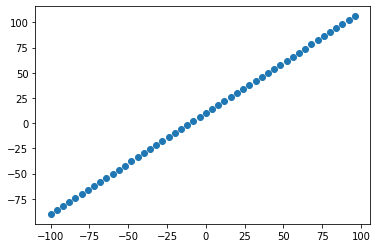

In [74]:
#Visualize the data
import matplotlib.pyplot as plt
#plt.plot(X, y) #line
plt.scatter(X, y)

###The three sets

* **Training set** - the model learns from this data, wich is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned(tweaked) on this data, wich is typically10-15% of the data available. This is dropped if u goes for two sets
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

⚡ **Three datasets:** You can see it this way:

* Training set -> Course material
* Validation set -> Practice exam
* Test set -> Final exam

**Generalization:** The ability for a machine learning model to perform well on data it hasn't seen before.

In [75]:
#Check the lenght of how many samples we have
len(X)
#Mnimum a 100+ for deep learning so we skip the Validation set for now

50

In [76]:
#Split the data into train and test sets
X_train =  X[:40] #first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] #last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

###Visualizing the data

Now we'vegot our data in traiong and test sets... let's visualize it again!

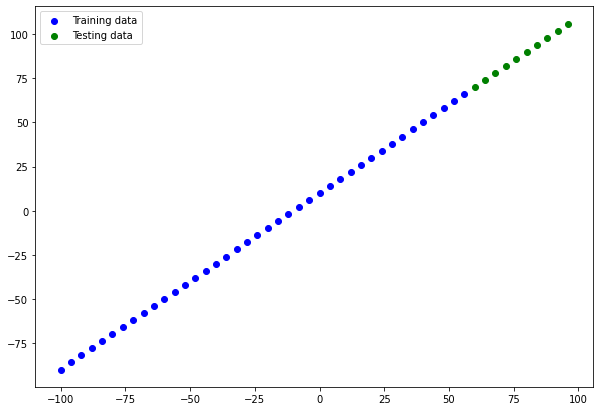

In [77]:
plt.figure(figsize=(10, 7))
#Plot training data in blue(c="b")
plt.scatter(X_train, y_train, c="b", label="Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
#Show legend
plt.legend(); #semicolon at the end so we dont get the matplotlib output

In [78]:
#Let's have a look at how to build a neural network for our data

#1. Create the model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

#2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#4. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 90.5424 - mae: 90.5424
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 55.0869 - mae: 55.0869
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 18.8117 - mae: 18.8117
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1430 - mae: 10.1430
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1354 - mae: 11.1354
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2855 - mae: 10.2855
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2888 - mae: 9.2888
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2041 - mae: 9.2041
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8460 - mae: 11.8460
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 13.7814 - mae: 13.7814
Epoch 11/100
2/2 [==============================] - 0s 7ms/ste

###Visualizing the model

In [79]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Let's create a model wich builds automatically by defining the input_shape argument in the first layer

In [80]:
#Let's create a model wich builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

#1. Create a model (same as above)
model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[1], name ="input_layer"),#Shape is the dimension of the tensor(or variables) X[0], y[0] 
   tf.keras.layers.Dense(100, activation="relu"),
   #tf.keras.layers.Dense(100, activation="relu"), #Worse with another layer
   
   tf.keras.layers.Dense(1, name="output_layer")                        
], name="model_1")

#2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              #optimizer=tf.keras.optimizers.SGD(),
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [81]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model. These are the patterns that the model is going to learn
* Trainable params - these are the parameters(patterns) the model can update as it trains
* Non-trainable params - these parameters aren´t updated during training(this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖**Resource:** For a more in-depth overview of the trainable parameters within a layer, checkout MITs introduction to deep learning video: https://www.youtube.com/watch?v=7sB052Pz0sQ&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI

In [82]:
#Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=1500, verbose=0) #verbose 0 no show of traing(output)

In [83]:
#Get asummary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


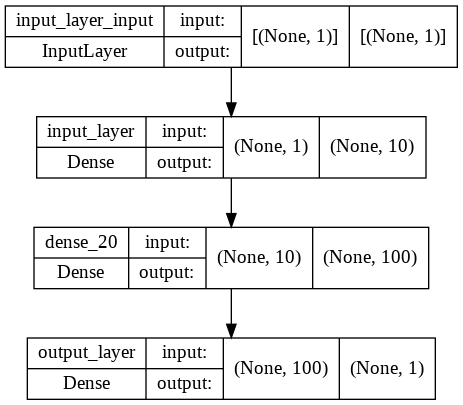

In [84]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True, to_file="model.png")

###Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them agains the ground truth labels.

Often you´ll see this in the form of "y_test" or "y_true" versus "y_pred"(ground truth versus your model´s predictions).

In [85]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.27821 ],
       [ 74.28338 ],
       [ 78.286385],
       [ 82.28882 ],
       [ 86.29059 ],
       [ 90.294426],
       [ 94.298164],
       [ 98.301704],
       [102.30525 ],
       [106.30881 ]], dtype=float32)

In [86]:
#It´s very similar to the test set(y_test)
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note:** If u feel like you´re going to reuse some kind of functionality in the future, it´s a good ide to turn it into a function for reuse purpose.

In [87]:
#Build a plotting function to visualizing the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10, 7))
  #Plot training data in blue
  plt.scatter(train_data,train_labels, c="b", label="Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot model´s predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions") #test_data=X_axis, predictions = Y_axis
  #Show the legend
  plt.legend();

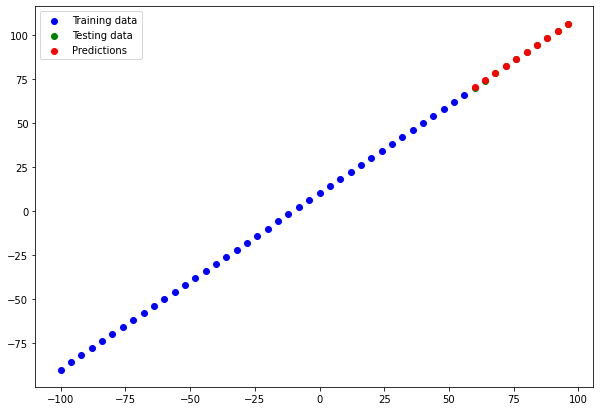

In [88]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

###Evaluating our model´s predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model´s performance.

Since we´re working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model´s predictions"
* MSE - mean square error, "square the average errors"

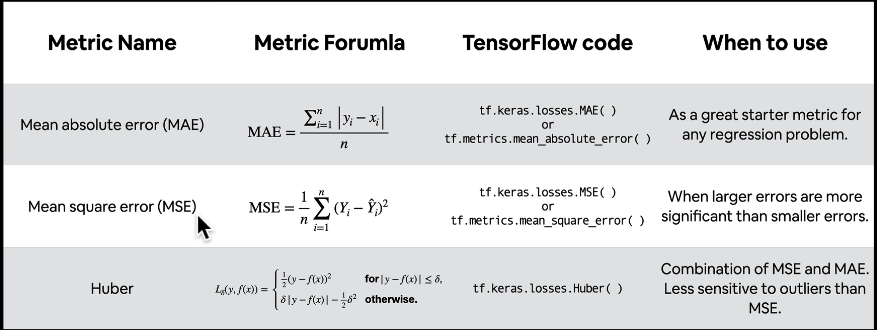

In [89]:
#Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 171ms/step - loss: 0.2936 - mae: 0.2936


[0.29357606172561646, 0.29357606172561646]

In [90]:
#Calculate the absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred)) #make y_pred into a tensor
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.77743 , 14.629972, 12.285446, 10.742236, 10.      , 10.058886,
       10.919266, 12.581022, 15.044202, 18.308807], dtype=float32)>

In [91]:
tf.constant(y_pred) 


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.27821 ],
       [ 74.28338 ],
       [ 78.286385],
       [ 82.28882 ],
       [ 86.29059 ],
       [ 90.294426],
       [ 94.298164],
       [ 98.301704],
       [102.30525 ],
       [106.30881 ]], dtype=float32)>

In [92]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [93]:
#Reshape the tensors so that we can evaluate the result(y_pred = shape(10,1), y_test = shape(10,))
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.27821 ,  74.28338 ,  78.286385,  82.28882 ,  86.29059 ,
        90.294426,  94.298164,  98.301704, 102.30525 , 106.30881 ],
      dtype=float32)>

In [94]:
#Calculate the Mean Absolute Error now when the tensors are in the same shape^^
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae #Gives the same result as the evaluate function at cell39

<tf.Tensor: shape=(), dtype=float32, numpy=0.29357377>

In [95]:
#Calculate the mean square error next
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.0862735>

In [104]:
#Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Building a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) -  this might come in the formof more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let´s do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. `model_4` - own choose
5. `model_5` - own choose

**Build `model_1`**

In [97]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)  #(1)=hidden units                           
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

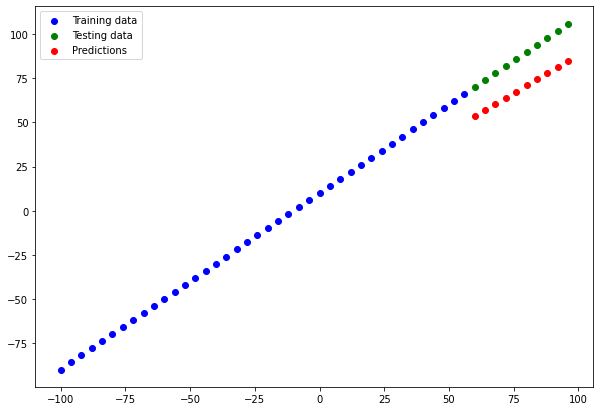

In [99]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test) #Make predictions on test data the model never have seen
plot_predictions(predictions=y_preds_1)

In [106]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1
#Every point is 18.74.. from where it should be(mae)


(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `moldel_2`**

* 2 dense layers, trained for 100 epochs